<a href="https://colab.research.google.com/github/Bhavya-Agrawal/Py_Projects/blob/master/Copy_of_Hand_Gesture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset from Kaggle + Unzip the folders

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parul28chutani","key":"9c60a932f1323a84550f04e21add8c5d"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 94% 265M/281M [00:03<00:00, 96.5MB/s]
100% 281M/281M [00:04<00:00, 73.5MB/s]


In [ ]:
from zipfile import ZipFile
isl = "/content/indian-sign-language-isl.zip"
with ZipFile(isl,'r') as zip:
  zip.extractall();
  print("Dataset uploaded successfully !!!")

Dataset uploaded successfully !!!


# **Collecting the dataset**


### **Fetching all images**

In [ ]:
from glob import glob

In [ ]:
images = glob('/content/Indian/*/*.jpg', recursive=True)

In [ ]:
images[42000]

'/content/Indian/4/537.jpg'

### **Fetching Images and corresponsing Labels**

In [ ]:
unique_labels = []

total_images = []
folder_labels = []
images = glob('/content/Indian/*/*.jpg', recursive=True)

for image in images:
  total_images.append(image)

  label = image.split('/')[-2]
  folder_labels.append(label)

  if label not in unique_labels:
    unique_labels.append(label)

In [ ]:
numerical_folder_labels=[]
for label in folder_labels:
  # print(type(label))
  # print(label)
  numerical_folder_labels.append(unique_labels.index(label))



print(numerical_folder_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(len(folder_labels))
print(len(total_images))
print(unique_labels)
print(len(unique_labels))

42745
42745
['N', 'M', '5', 'E', 'O', '6', 'S', 'Q', 'Z', 'B', 'L', '3', 'R', 'I', 'Y', '1', 'A', '2', 'T', 'D', '7', '9', 'H', 'U', 'J', '8', 'V', 'K', 'P', 'G', 'X', 'W', 'C', 'F', '4']
35


# Train-Test Split

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/Indian', 
                   output = 'ISL',
                   seed = 22, ratio = (.7,.2,.1))

Copying files: 42745 files [00:06, 6764.35 files/s]


## Data Augmentation

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data augmentation step
training_data_generator = ImageDataGenerator(rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             validation_split=0.2)

test_data_generation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = training_data_generator.flow_from_directory('/content/ISL/train', 
                                                               target_size=(50, 50), 
                                                               batch_size=20,
                                                               class_mode='binary')

validation_generator = training_data_generator.flow_from_directory('/content/ISL/val',
                                                                target_size=(50, 50),
                                                                batch_size=20,
                                                                class_mode='binary')
test_generator = test_data_generation.flow_from_directory('/content/ISL/test',
                                                                target_size=(50, 50),
                                                                batch_size=20,
                                                                class_mode='binary')

Found 29919 images belonging to 36 classes.
Found 8547 images belonging to 36 classes.
Found 4279 images belonging to 36 classes.


In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

32058
G


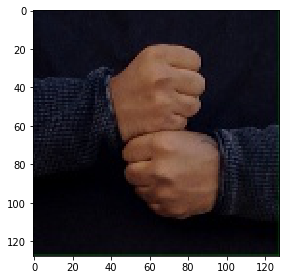

O


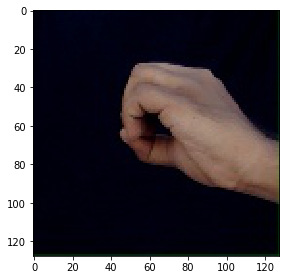

I


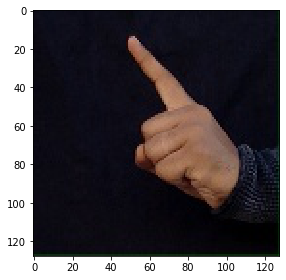

6


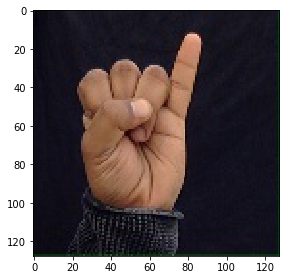

B


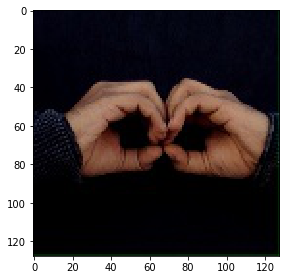

In [ ]:
# train_images,train_labels = train_generator.next()

print(len(training_images))
for i in range(0,5):
    image = training_images[i]
    print(training_labels[i])
    imshow(image)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from time import time

In [ ]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=( 50, 50, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(215, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(190, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 150)       4200      
                                                                 
 activation_18 (Activation)  (None, 48, 48, 150)       0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 150)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 200)       270200    
                                                                 
 activation_19 (Activation)  (None, 22, 22, 200)       0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 200)      0         
 g2D)                                                 

In [ ]:
r = model.fit_generator(
        train_generator,
        #steps_per_epoch=18631 // batch_size,
        epochs=4,
        validation_data=validation_generator,
        #validation_steps=10119 // batch_size
        )

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


 193/1496 [==>...........................] - ETA: 11:13 - loss: -135401368977408.0000 - accuracy: 0.0269